In [1]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast
import plotly.graph_objects as go

C:\Users\I6240624\AppData\Local\Temp\ipykernel_11896\3671845348.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins = list(reader_ins)

In [3]:
#read in TikTok data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt = list(reader_tt)

In [4]:
# Read in the first YouTube data file
file_path_en = r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en.csv'
with open(file_path_en, 'r', encoding='utf-8') as f_en:
    reader_en = csv.reader(f_en, delimiter=',')
    rows_en = list(reader_en)

# Read in the second YouTube data file
file_path_nl = r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl.csv'
with open(file_path_nl, 'r', encoding='utf-8') as f_nl:
    reader_nl = csv.reader(f_nl, delimiter=',')
    rows_nl = list(reader_nl)

# Combine the rows from both files
rows_yt = rows_en + rows_nl

In [5]:
# Making the TikTok dataframe
dfins = pd.DataFrame(rows_ins)
# Making the first row the header
new_header = dfins.iloc[0] 
dfins = dfins[1:]
dfins.columns = new_header 
#dfins

In [6]:
# Making the TikTok dataframe
dftt = pd.DataFrame(rows_tt)
# Making the first row the header
new_header = dftt.iloc[0] 
dftt = dftt[1:]
dftt.columns = new_header 
#dftt

In [7]:
dftt

,Unnamed: 0.1,Unnamed: 0,username,id,video_description,create_time,region_code,share_count,view_count,like_count,comment_count,music_id,hashtag_names,effect_ids,playlist_id,language_detect
1,0,0,addoveldhuizen,6811889223365430272,#foryou #foryoupage #fyp #tiktot #tiktotnl #ru...,2020-04-04 16:09:14,NL,289.0,287153.0,17074.0,101.0,6.811881334529691e+18,"['russia', 'foryou', 'fyp', 'tiktot', 'foryoup...",,,Language.ENGLISH
2,1,1,addoveldhuizen,6811487581214100480,#foryou #foryoupage #fyp #tiktokforyou #tiktok...,2020-04-03 14:10:45,NL,134.0,482253.0,8583.0,126.0,6.783671027810455e+18,"['foryou', 'fyp', 'foryoupage', 'tiktokforyou'...","['269391', '0']",,Language.ENGLISH
3,2,2,addoveldhuizen,6822215629127306240,Wie heeft er ook een hond?🐕 #honden #uitgaan #...,2020-05-02 12:00:57,NL,227.0,256247.0,25302.0,165.0,6.822215590166482e+18,"['honden', 'woef', 'uitgaan']",['0'],,Language.DUTCH
4,3,3,addoveldhuizen,6821408834825899008,#sushi #eating #japan #foryou #foryoupage,2020-04-30 07:50:16,NL,507.0,115427.0,9411.0,223.0,6.679335648706547e+18,"['eating', 'japan', 'sushi', 'foryou', 'foryou...",['0'],,Language.ENGLISH
5,4,4,addoveldhuizen,6821105591361047552,Ziekenhuis verschillende talen! 🏥#ziekenhuis #...,2020-04-29 12:13:26,NL,141.0,39222.0,3299.0,36.0,6.821105538114424e+18,"['foryou', 'talen', 'ziekenhuis', 'krankenhaus...",['0'],,Language.DUTCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51822,138143,138143,zoetezusjes_official,7179253622855732224,Wij gingen onze eigen squishies maken met doct...,2022-12-20 15:30:46,NL,2.0,3266.0,140.0,0.0,7.179253625523391e+18,"['fyp', 'zoetezusjes']",['0'],,Language.DUTCH
51823,138144,138144,zoetezusjes_official,7179173848657447936,Wij gingen kijken wie Janna het beste kent! He...,2022-12-20 10:21:13,NL,1.0,4064.0,144.0,3.0,7.179173839862697e+18,"['fyp', 'zoetezusjes']",['0'],,Language.DUTCH
51824,138145,138145,zoetezusjes_official,7195707723042868224,"Wij bouwden een kermis in ons eigen huis, het ...",2023-02-02 23:41:04,NL,5.0,15075.0,224.0,18.0,7.195707725488836e+18,"['fyp', 'zoetezusjes']",,,Language.DUTCH
51825,138146,138146,zoetezusjes_official,7192139431254428672,Wij deden de Kies Niet De Verkeerde Cadeau Cha...,2023-01-24 08:54:22,NL,2.0,10171.0,188.0,6.0,7.192139408802745e+18,"['fyp', 'zoetezusjes']",,,Language.DUTCH


In [64]:
# Making the YouTube dataframe
dfyt = pd.DataFrame(rows_yt)
# Making the first row the header
new_header = dfyt.iloc[0] 
dfyt = dfyt[1:]
dfyt.columns = new_header 
#dfyt

In [ ]:
# Listing all the username for the Instagram Dataset
dfins['username'] = dfins['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf = set(dfins['username'].unique())

dftt['username'] = dftt['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf = set(dftt['username'].unique())

dfyt['channel_title'] = dfyt['channel_title'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf = set(dfyt['channel_title'].unique())

In [ ]:
# Find common elements between lists
common_in_1_and_2 = insinf.intersection(ttinf)
common_in_1_and_3 = insinf.intersection(ytinf)
common_in_2_and_3 = ttinf.intersection(ytinf)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf:
        count += 1
    if name in ttinf:
        count += 1
    if name in ytinf:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf, ttinf, ytinf], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

In [ ]:
# Convert to datetime format
dfins['date'] = pd.to_datetime(dfins['date'])

# Group by the day and count instances for each week
count_by_week = dfins.resample('W-Mon', on='date').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['date'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format
dftt['create_time'] = pd.to_datetime(dftt['create_time'])

# Group by the day and count instances for each week
count_by_week = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['create_time'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'], errors='coerce')

# Group by the day and count instances for each week
count_by_week = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['published_at_video'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Convert to datetime format for each DataFrame
dfins['date'] = pd.to_datetime(dfins['date'])
dftt['create_time'] = pd.to_datetime(dftt['create_time'])
dfyt['published_at_video'] = pd.to_datetime(dfyt['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
insall = dfins[dfins['username'].isin(all_common_elements)]
ins12 = dfins[dfins['username'].isin(common_in_1_and_2)]
ins13 = dfins[dfins['username'].isin(common_in_1_and_3)]

ttall = dftt[dftt['username'].isin(all_common_elements)]
tt21 = dftt[dftt['username'].isin(common_in_1_and_2)]
tt23 = dftt[dftt['username'].isin(common_in_2_and_3)]

ytall = dfyt[dfyt['channel_title'].isin(all_common_elements)]
yt31 = dfyt[dfyt['channel_title'].isin(common_in_1_and_3)]
yt32 = dfyt[dfyt['channel_title'].isin(common_in_2_and_3)]

In [ ]:
# Calculate the proportions of each language
insall = insall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = insall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dfins = dfins.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfins['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ins12 = ins12.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins12['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ins13 = ins13.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ins13['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ttall = ttall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ttall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dftt = dftt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dftt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
tt23 = tt23.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt23['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color=('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
tt21 = tt21.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = tt21['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
dfyt = dfyt.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = dfyt['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
ytall = ytall.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = ytall['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
yt31 = yt31.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt31['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the proportions of each language
yt32 = yt32.replace('', pd.NA).dropna(subset=['language_detect'], how='all')
language_counts = yt32['language_detect'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color = ('skyblue','orange'))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the time between posts for influencers
timediffins = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [dfins[dfins['username'] == username]['date'].sort_values().diff().mean() for username in insinf]
})

timedifftt = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [dftt[dftt['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf]
})

timediffyt = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [dfyt[dfyt['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf]
})

In [ ]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
timediffinsEN = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [
        dfins[(dfins['username'] == username) & (dfins['language_detect'] == 'Language.ENGLISH')]['date']
        .sort_values()
        .diff()
        .mean()
        for username in insinf
    ]
})
timediffinsDU = pd.DataFrame({
    "Username": list(insinf),
    'Time Difference': [
        dfins[(dfins['username'] == username) & (dfins['language_detect'] == 'Language.DUTCH')]['date']
        .sort_values()
        .diff()
        .mean()
        for username in insinf
    ]
})


timediffttEN = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [
        dftt[(dfins['username'] == username) & (dftt['language_detect'] == 'Language.ENGLISH')]['create_time']
        .sort_values()
        .diff()
        .mean()
        for username in ttinf
    ]
})
timediffttDU = pd.DataFrame({
    "Username": list(ttinf),
    'Time Difference': [
        dftt[(dftt['username'] == username) & (dftt['language_detect'] == 'Language.DUTCH')]['create_time']
        .sort_values()
        .diff()
        .mean()
        for username in ttinf
    ]
})


timediffytEN = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [
        dfyt[(dfyt['channel_title'] == username) & (dfyt['language_detect'] == 'Language.ENGLISH')]['published_at_video']
        .sort_values()
        .diff()
        .mean()
        for username in ytinf
    ]
})
timediffytDU = pd.DataFrame({
    "Username": list(ytinf),
    'Time Difference': [
        dfyt[(dfyt['channel_title'] == username) & (dfyt['language_detect'] == 'Language.DUTCH')]['published_at_video']
        .sort_values()
        .diff()
        .mean()
        for username in ytinf
    ]
})

In [ ]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffinsEN["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffinsDU["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['English', 'Dutch'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Combine the data into a list of arrays
data_to_plot = [
    timediffttEN["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffttDU["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['English', 'Dutch'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [8]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_en = list(reader_ins)
    #read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_nl = list(reader_ins)

In [9]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_en = list(reader_tt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_nl = list(reader_tt)

In [10]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_en = list(reader_yt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_nl = list(reader_yt)

In [11]:
# Making the Instagram dataframe DUTCH
dfins_nl = pd.DataFrame(rows_ins_nl)
# Making the first row the header
new_header = dfins_nl.iloc[0] 
dfins_nl = dfins_nl[1:]
dfins_nl.columns = new_header

# Making the Instagram dataframe ENGLISH
dfins_en = pd.DataFrame(rows_ins_en)
# Making the first row the header
new_header = dfins_en.iloc[0] 
dfins_en = dfins_en[1:]
dfins_en.columns = new_header

In [12]:
# Making the YouTube dataframe DUTCH
dfyt_nl = pd.DataFrame(rows_yt_nl)
# Making the first row the header
new_header = dfyt_nl.iloc[0] 
dfyt_nl = dfyt_nl[1:]
dfyt_nl.columns = new_header 

# Making the YouTube dataframe ENGLISH
dfyt_en = pd.DataFrame(rows_yt_en)
# Making the first row the header
new_header = dfyt_en.iloc[0] 
dfyt_en = dfyt_en[1:]
dfyt_en.columns = new_header

In [13]:
# Making the TikTok dataframe DUTCH
dftt_nl = pd.DataFrame(rows_tt_nl)
# Making the first row the header
new_header = dftt_nl.iloc[0] 
dftt_nl = dftt_nl[1:]
dftt_nl.columns = new_header 

# Making the TikTok dataframe ENGLISH
dftt_en = pd.DataFrame(rows_tt_en)
# Making the first row the header
new_header = dftt_en.iloc[0] 
dftt_en = dftt_en[1:]
dftt_en.columns = new_header

### Network for English Instagram

In [76]:
dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

C:\Users\I6240624\AppData\Local\Temp\ipykernel_1932\1369689326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")


In [77]:
sample_size = 1000
random_sample = dfinshas_en.sample(n=sample_size, random_state=42)

In [78]:
G_en = nx.Graph()
for words_list in random_sample['caption_hashtags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

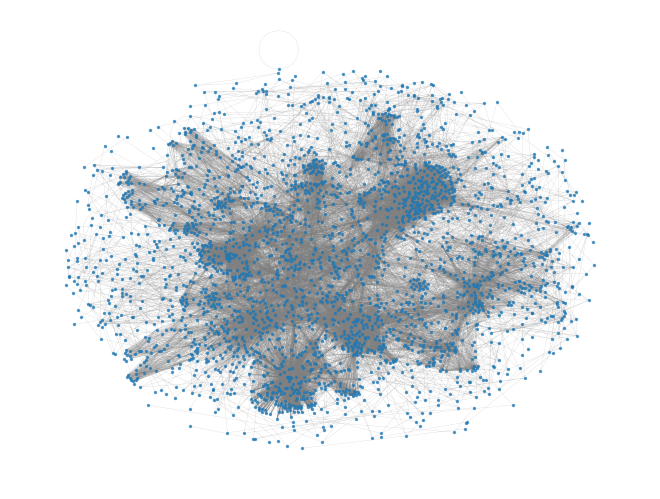

In [79]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch Instagram

In [80]:
dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

C:\Users\I6240624\AppData\Local\Temp\ipykernel_1932\917034545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")


In [81]:
sample_size = 1000
random_sample = dfinshas_nl.sample(n=sample_size, random_state=42)

In [82]:
G_nl = nx.Graph()
for words_list in random_sample['caption_hashtags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

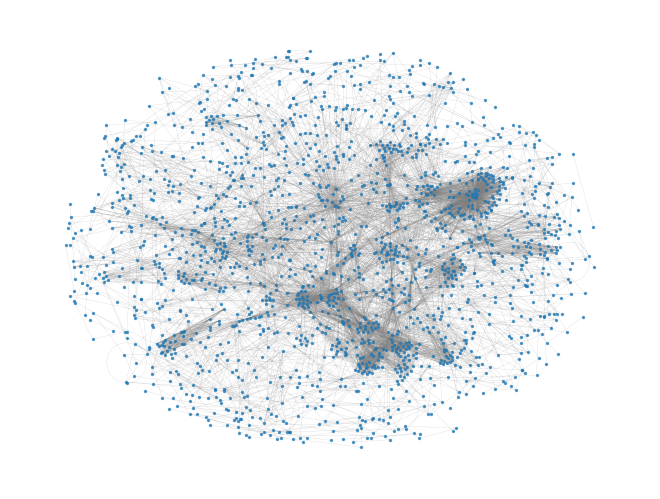

In [83]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English TikTok

In [14]:
dftt_en["hashtag_names"] = dftt_en["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_en = dftt_en[dftt_en["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

In [15]:
sample_size = 1000
random_sample = dftthas_en.sample(n=sample_size, random_state=42)

In [16]:
G_en = nx.Graph()
for words_list in random_sample['hashtag_names']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

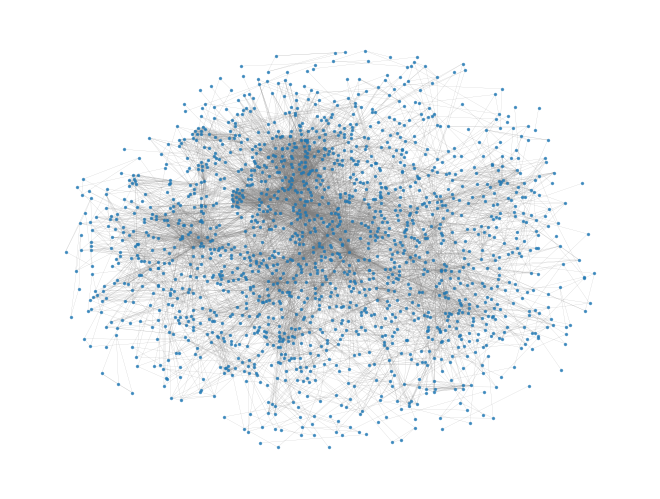

In [17]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch TikTok

In [18]:
dftt_nl["hashtag_names"] = dftt_nl["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_nl = dftt_nl[dftt_nl["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

In [19]:
sample_size = 1000
random_sample = dftthas_nl.sample(n=sample_size, random_state=42)

In [20]:
G_nl = nx.Graph()
for words_list in random_sample['hashtag_names']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

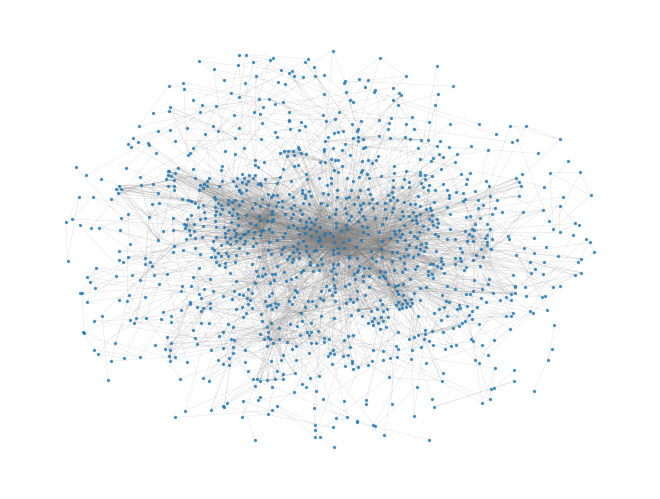

In [21]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English YouTube

In [22]:
# Convert string representations of tags into lists
dfyt_en["tags"] = dfyt_en["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_en = dfyt_en[dfyt_en["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [23]:
sample_size = 200
random_sample = dfythas_en.sample(n=sample_size, random_state=42)

In [24]:
G_en = nx.Graph()
for words_list in random_sample['tags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

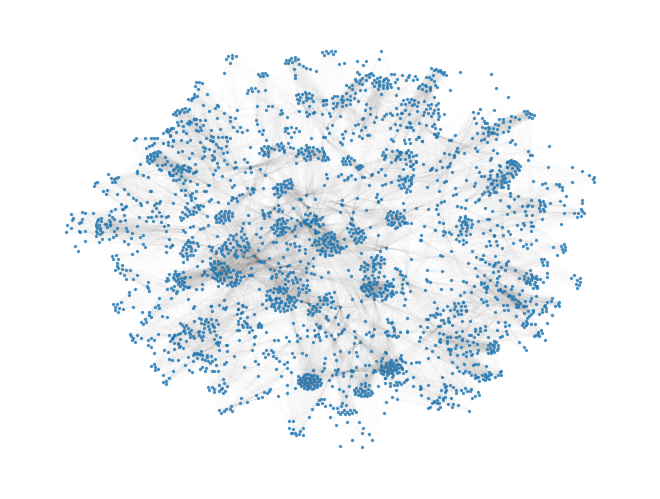

In [30]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.01, alpha=0.7)

### Network for Dutch YouTube

In [26]:
# Convert string representations of tags into lists
dfyt_nl["tags"] = dfyt_nl["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_nl = dfyt_nl[dfyt_nl["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [27]:
sample_size = 200
random_sample = dfythas_nl.sample(n=sample_size, random_state=42)

In [28]:
G_nl = nx.Graph()
for words_list in random_sample['tags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

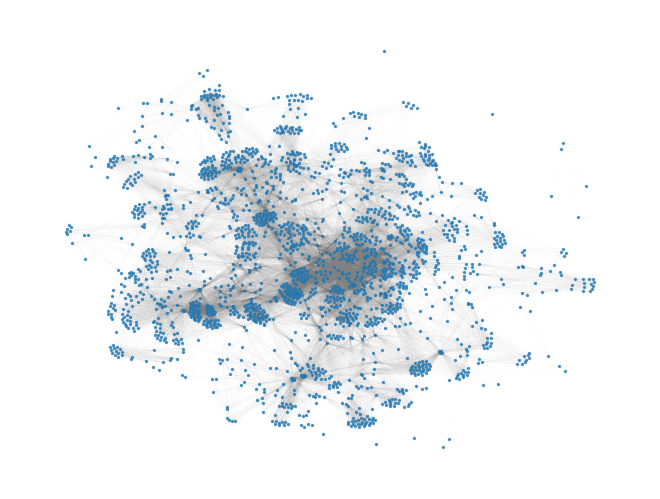

In [31]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.01, alpha=0.7)

## English Instagram Tags Network

In [32]:
dfins_en["tagged_users"] = dfins_en["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinstag_en = dfins_en[dfins_en["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [33]:
sample_size = 1000
random_sample = dfinstag_en.sample(n=sample_size, random_state=42)

In [34]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

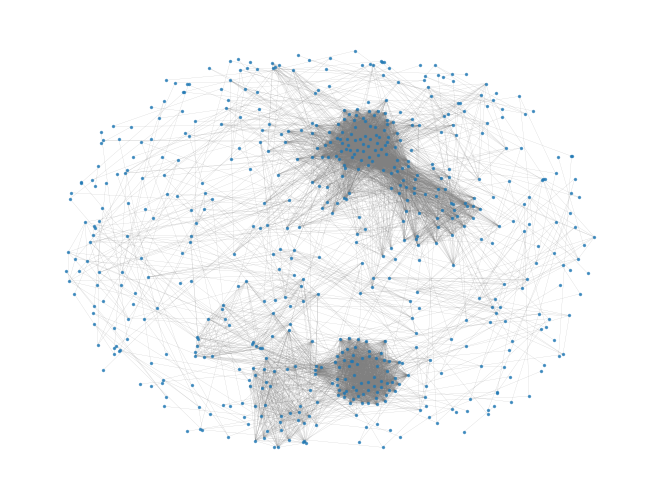

In [35]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch Instagram Tags Network

In [36]:
dfins_nl["tagged_users"] = dfins_nl["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinstag_nl = dfins_nl[dfins_nl["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [37]:
sample_size = 1000
random_sample = dfinstag_nl.sample(n=sample_size, random_state=42)

In [38]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

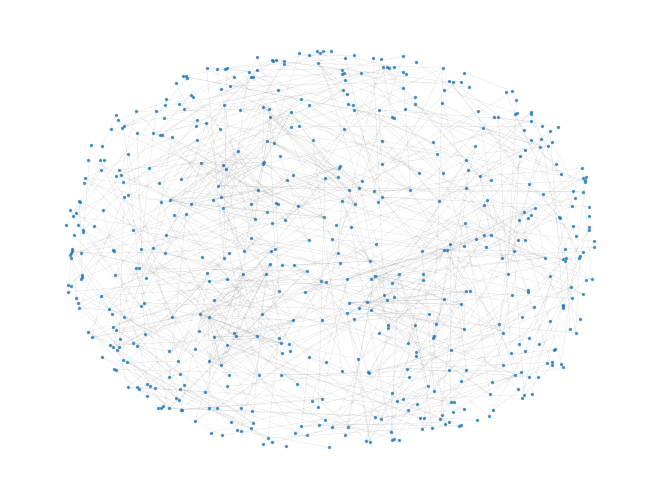

In [39]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English TikTok Tags Network

In [41]:
# Convert string representations of tags into lists
dftt_en["tagged_user"] = dftt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_en = dftt_en[dftt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [42]:
sample_size = 1000
random_sample = dftttag_en.sample(n=sample_size, random_state=42)

In [43]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

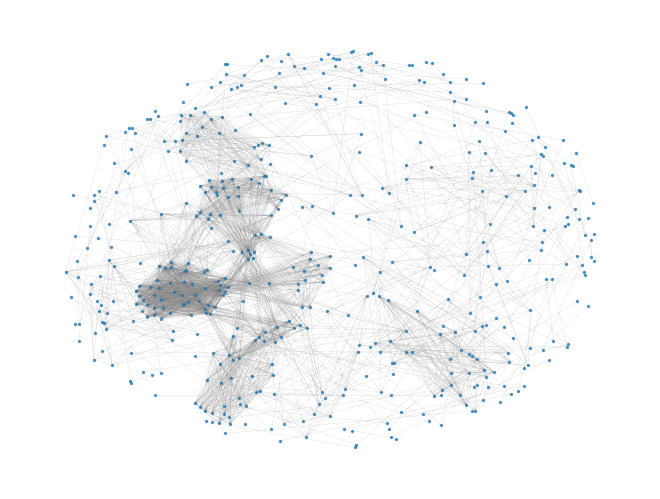

In [44]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch TikTok Tags Network

In [45]:
# Convert string represnlltations of tags into lists
dftt_nl["tagged_user"] = dftt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_nl = dftt_nl[dftt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [46]:
sample_size = 1000
random_sample = dftttag_nl.sample(n=sample_size, random_state=42)

In [47]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

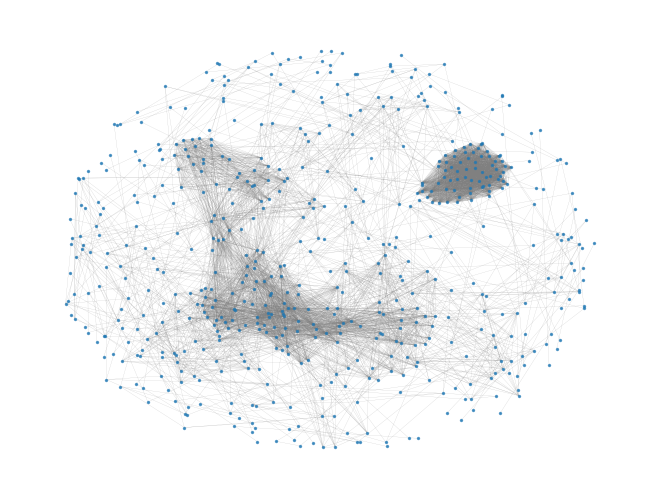

In [48]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English YouTube Tags Network

In [49]:
# Convert string representations of tags into lists
dfyt_en["tagged_user"] = dfyt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_en = dfyt_en[dfyt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [50]:
sample_size = 1000
random_sample = dfyttag_en.sample(n=sample_size, random_state=42)

In [51]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

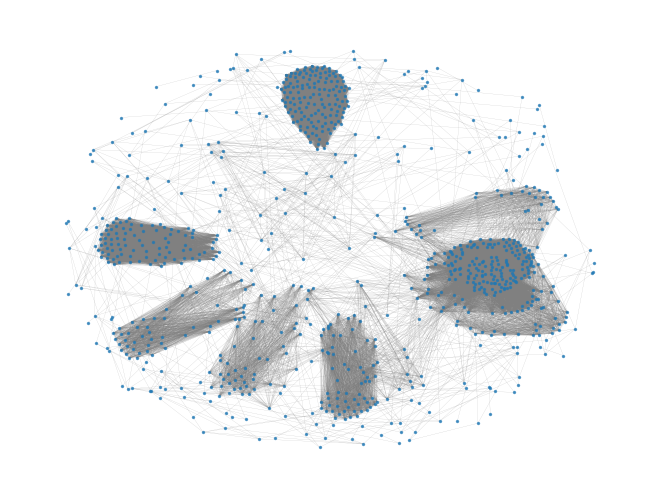

In [52]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch YouTube Tags Network

In [53]:
# Convert string represnltations of tags into lists
dfyt_nl["tagged_user"] = dfyt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_nl = dfyt_nl[dfyt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [54]:
sample_size = 1000
random_sample = dfyttag_nl.sample(n=sample_size, random_state=42)

In [55]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in random_sample.iterrows():
    for j, row2 in random_sample.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

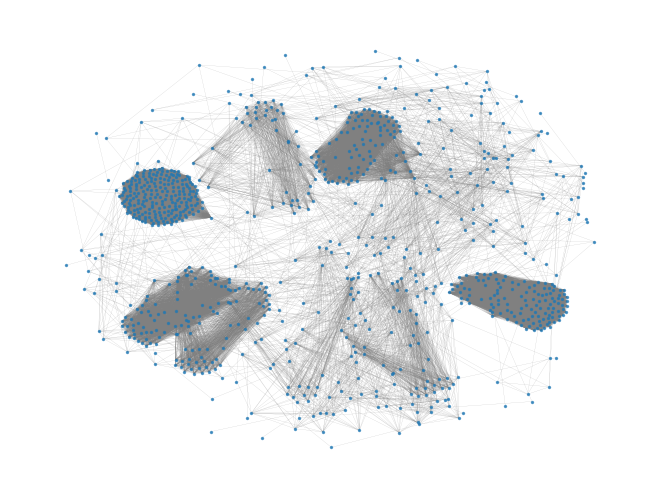

In [56]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)